In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

In [38]:
DF = pd.read_csv("/content/heart_statlog_cleveland_hungary_final.csv")

In [39]:
DF.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


# **About the dataset**

1. age -> (Numeric)
2. sex -> (Categorical/Binary)
3. chest pain type -> (Categorical/Nominal)
4. resting bps -> (Numeric)
5. cholesterol -> (Numeric)
6. fasting blood sugar -> (Categorical/Binary)
7. resting ecg -> (Categorical/Nominal)
8. max heart rate -> (Numeric)
9. exercise angina -> (Categorical/Binary)
10. oldpeak -> (Numeric)
11. ST slope -> (Categorical/Nominal)
12. target -> (Categorical/Binary)


Input features:

* Numeric: "age", "resting bps", "cholesterol", "max heart rate", "oldpeak"

* Nominal: "chest pain type", "resting ecg", "ST slope"

* Binary: "sex", "fasting blood sugar", "exercise angina"

Output:
* Binary: "target"

In [40]:
DF.shape

(1190, 12)

In this particular dataset, there are 1190 instances(rows) and 12 features(columns).

In [41]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


From above, we see that there are no null values in our dataset. The label is binary. Other input features include 5 numeric, 3 nominal and 3 binary.

In [42]:
DF.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.625210,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.608908,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


Above we get the mean, standard-deviation(std), minimum-value, maximum-value, first-quartile(Q1 or 25%), second-quartile(Q2 or 50% or median), third-quartile(Q3 or 75%).

<ipython-input-43-bc85efbfbfb5>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  DF.hist(ax=ax)


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest pain type'}>],
       [<Axes: title={'center': 'resting bp s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting blood sugar'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'max heart rate'}>,
        <Axes: title={'center': 'exercise angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST slope'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

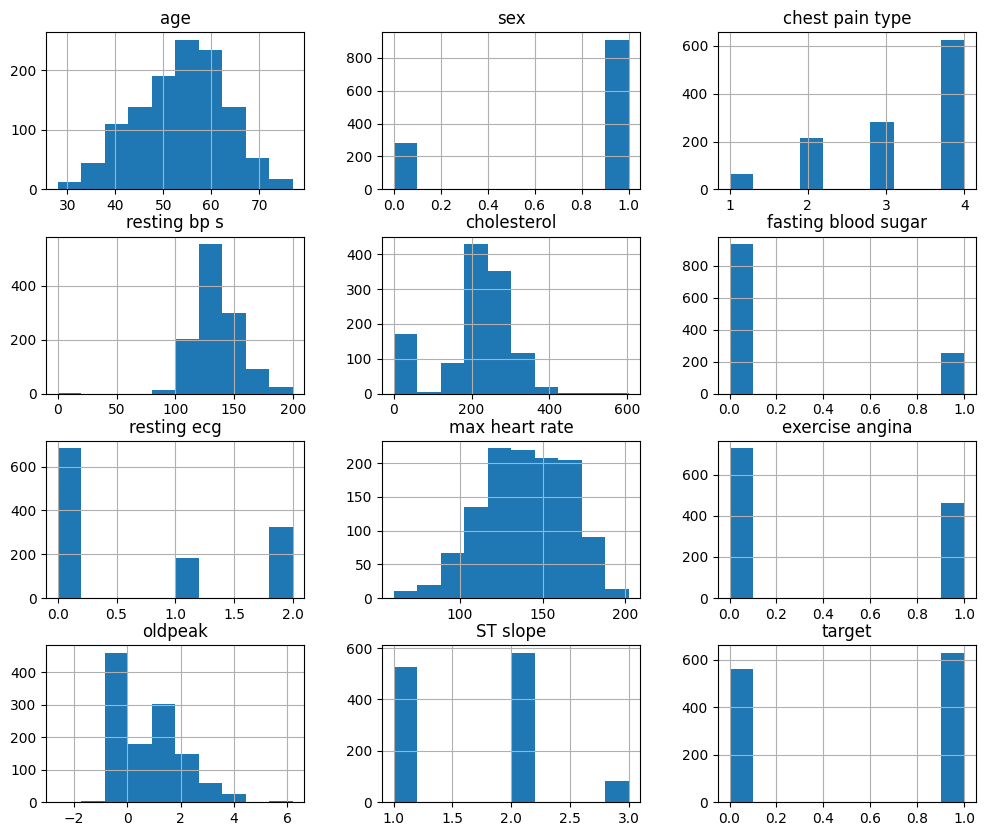

In [43]:
fig, ax = plt.subplots(figsize=(12, 10))
DF.hist(ax=ax)

In the above plots we can observe a few things:

1. "age"(Numeric): is almost normally distributed with little bit of skewed to the left.
2. "sex"(Binary): doesn't have equal frequency for each sex(male: 1 & female: 0). So, for training purpose, we have to split the DF into such that male:female ratio remains same(Stratified Sampling). Otherwise, we can get large amount of male and negligible amount of female in our training set. That will lead us to erronous result.
3. "chest pain type"(Nominal): has 4 values. Now, value 4 has much more high frequency than value 1. So, we have to split the data accordingly.
4. "resting bp s"(Numeric): is almost normally distributed. But there may be some outliars(we have to check it).
5. "cholesterol"(Numeric): is having normal distribution except, at the 0~80 range, the frequency in high.
6. "fasting blood sugar"(Binary): is having (fasting blood sugar > 120 mg/dl) => (1 = true; 0 = false). Now, this feature doesn't contain same ratio of values. So, we have to divide the test-train set by stratified sampling.
7. "resting ecg"(Nominal): has 3 values. Value 0 has the highest frequency.
8. "max heart rate"(Numeric): is normally distributed with little left skewness.
9. "exercise angina"(Binary): This feature almost have an equal ratio(60:40). So, we don't have to worry about that.
10. "oldpeak"(Numeric): is clearly right skewed.
11. "ST slope"(Nominal): Value 1: upsloping, Value 2: flat, Value 3: downsloping. Now value 3 has very less frequency. We have to make sure we get equal proportion in training and testing set.
12. "target"(Binary): This has ~same proportion of values.

In [50]:
print(DF["sex"].value_counts())
print(DF["chest pain type"].value_counts())
print(DF["fasting blood sugar"].value_counts())
print(DF["resting ecg"].value_counts())
print(DF["exercise angina"].value_counts())
print(DF["ST slope"].value_counts())
print(DF["target"].value_counts())

sex
1    909
0    281
Name: count, dtype: int64
chest pain type
4    625
3    283
2    216
1     66
Name: count, dtype: int64
fasting blood sugar
0    936
1    254
Name: count, dtype: int64
resting ecg
0    684
2    325
1    181
Name: count, dtype: int64
exercise angina
0    729
1    461
Name: count, dtype: int64
ST slope
2    582
1    527
3     81
Name: count, dtype: int64
target
1    629
0    561
Name: count, dtype: int64


Above, we get the frequency of each categorical datas.

Now, we have to first, detect if any outliars are present using boxplot. Then we will take action based on that.

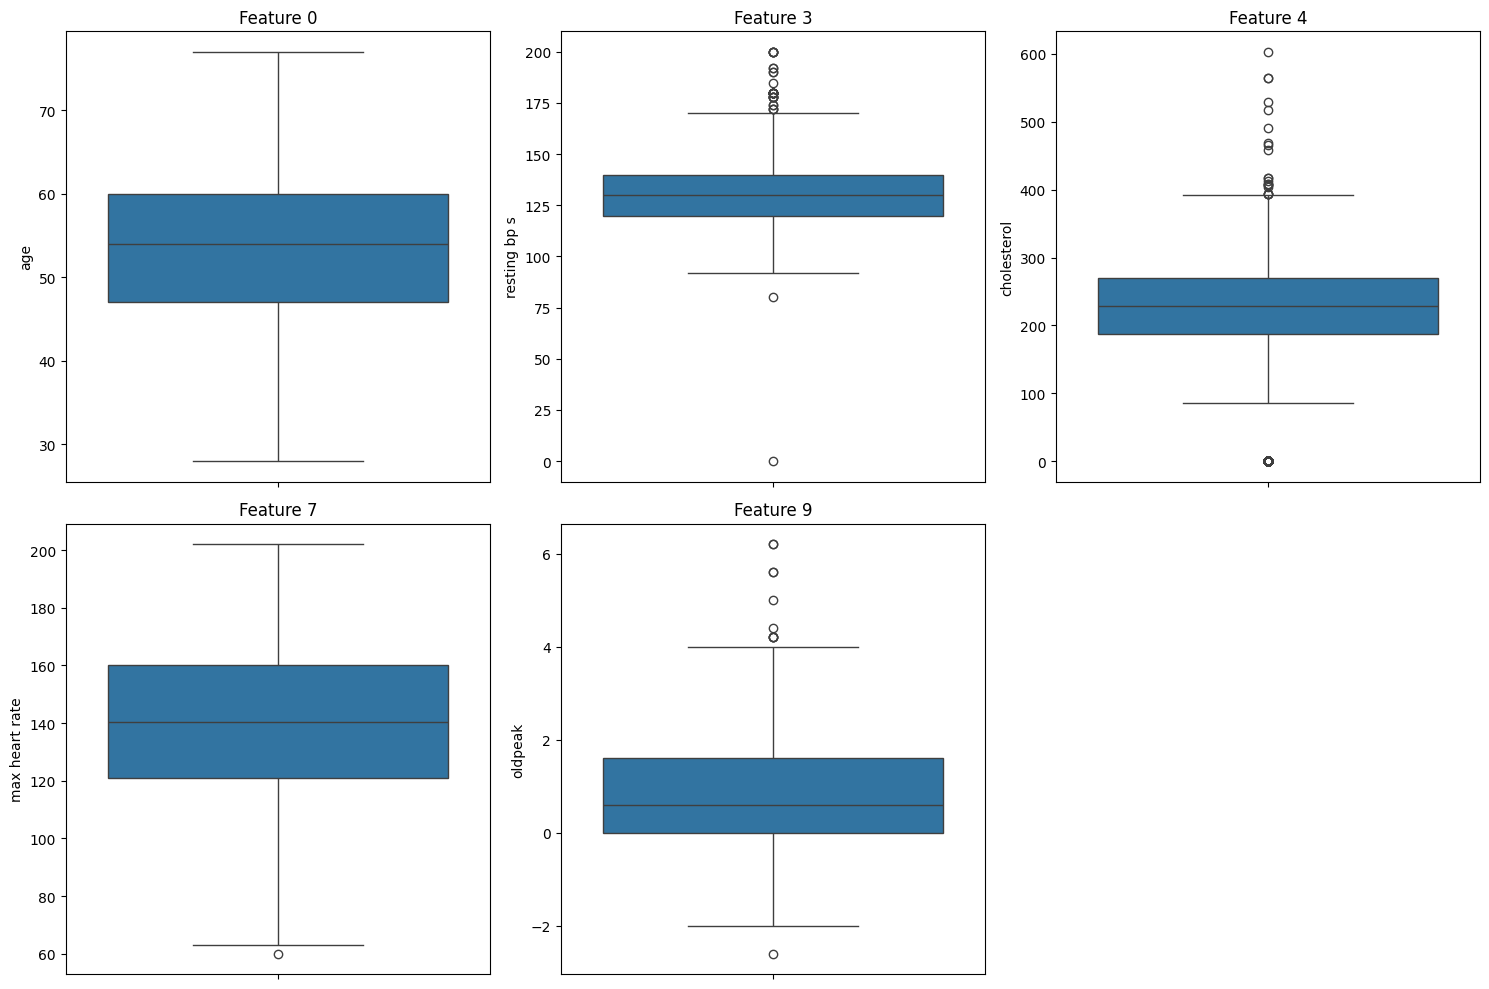

In [44]:
numeric_feature_columns = [0, 3, 4, 7, 9]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, numeric_feature in enumerate(numeric_feature_columns):
    sns.boxplot(y=DF.iloc[:, numeric_feature], ax=axes[i])
    axes[i].set_title(f'Feature {numeric_feature}')
    axes[i].set_xlabel('')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()

plt.show()

Above we can see that there are outliars, present in our dataset. So, we can either eliminate the whole row or just suppress the outliars in the 1.5xIQR range. Below I will suppress the outliars. Suppressing the ouliars will save some data.

In [45]:
for numeric_feature in numeric_feature_columns:
    Q1 = DF.iloc[:, numeric_feature].quantile(0.25)
    Q3 = DF.iloc[:, numeric_feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    DF.loc[DF.iloc[:, numeric_feature] > upper, DF.columns[numeric_feature]] = upper
    DF.loc[DF.iloc[:, numeric_feature] < lower, DF.columns[numeric_feature]] = lower


In [63]:
train_DF, test_DF = train_test_split(DF, test_size=0.2, random_state=42)

<ipython-input-64-01b74e2cc0ea>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_DF.hist(ax=ax)


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest pain type'}>],
       [<Axes: title={'center': 'resting bp s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting blood sugar'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'max heart rate'}>,
        <Axes: title={'center': 'exercise angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST slope'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

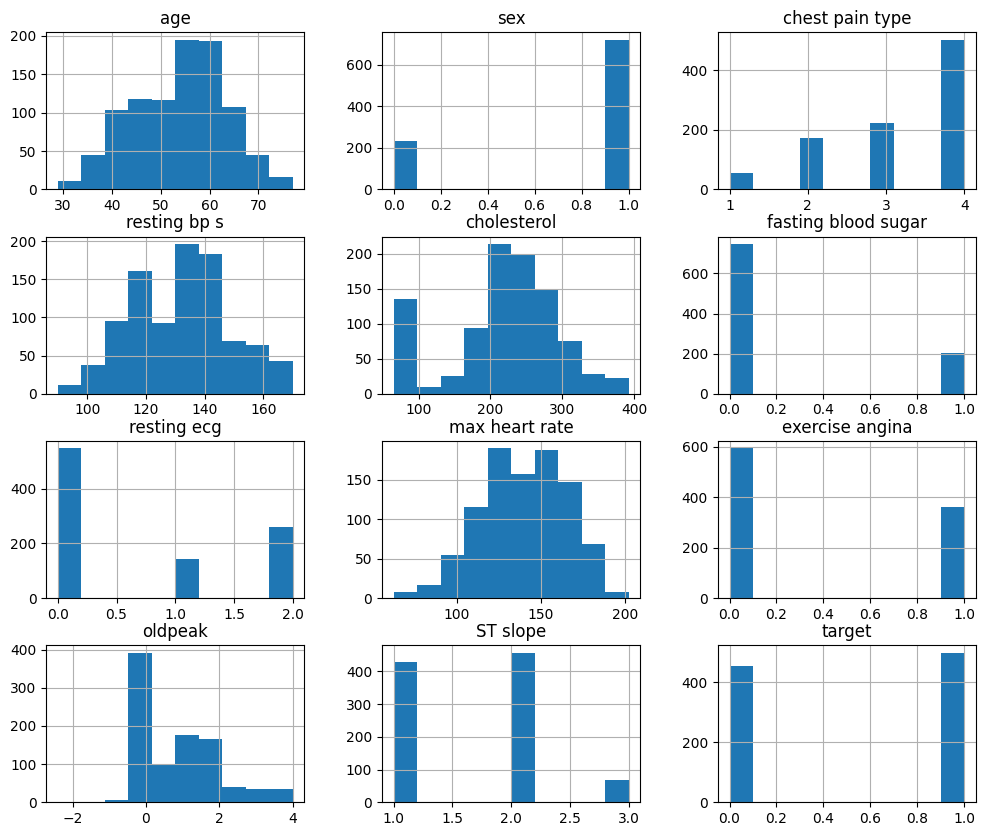

In [64]:
fig, ax = plt.subplots(figsize=(12, 10))
train_DF.hist(ax=ax)

<Axes: >

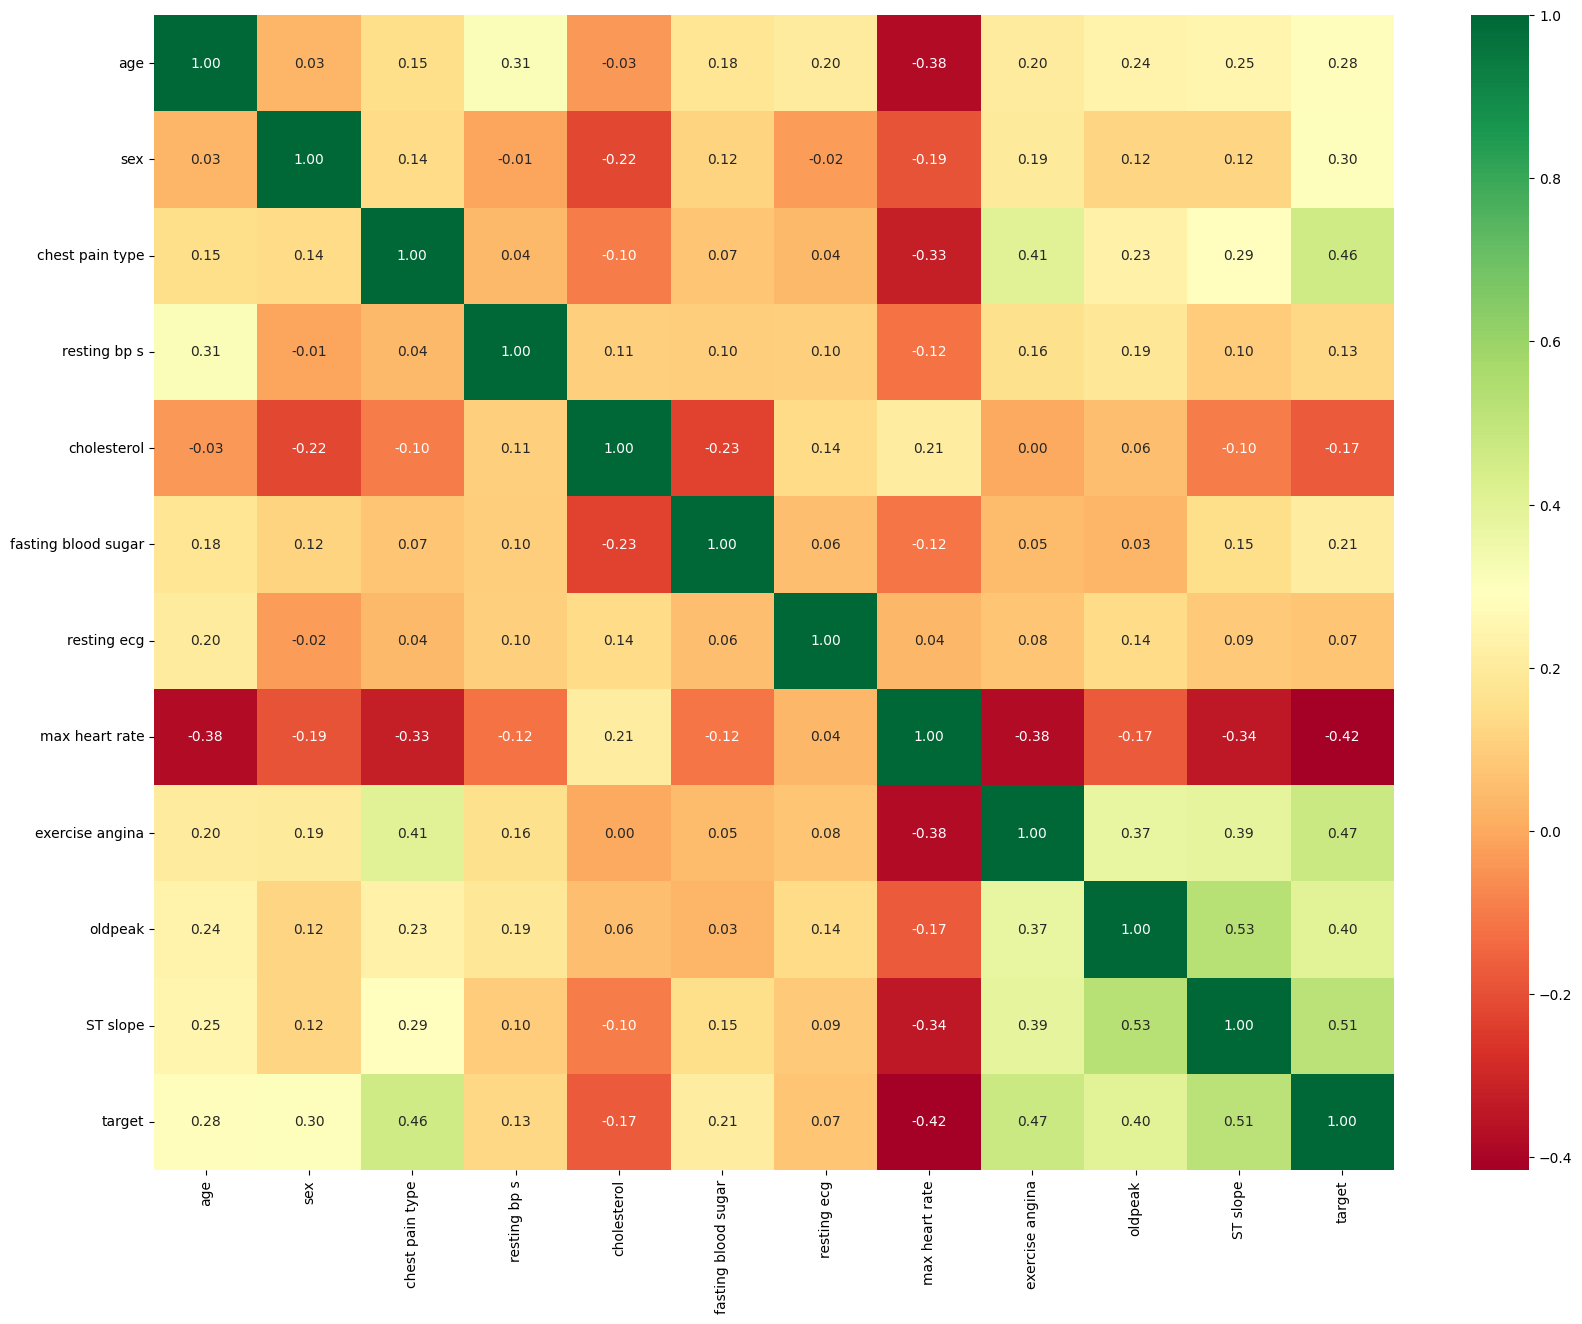

In [65]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(train_DF.corr(), annot=True, fmt=".2f", ax=ax, cmap="RdYlGn")

In the above correlation heatmap, we can see that,

"ST slpoe", "exercise angina", "chest pain type", "oldpeak" has higher correlation with "target".

"sex", "age", "fasting blood sugar" has moderate to low correlation.

"resting bp s" and "resting ecg" have lowest positive correlation.

"max heart rate" and "cholesterol" have -ve correlation with "target". "max heart rate" has highest -ve correlation.

Other than the correlation with the target variable. We have some internal correlation with input features as can be seen in the correlation matrix.

"old peak" and "ST slope" have highest positive correlation with each other. "chest pain type" and "exercise angina" also have good correlation.

"max heart rate" and "exercise angina" have highest -ve correlation with each other. "max heart rate" also have good correlation with "age", "chest pain type" and "ST slope".


In [67]:
scaler = MinMaxScaler()
train_DF.iloc[:, numeric_feature_columns] = scaler.fit_transform(train_DF.iloc[:, numeric_feature_columns])
train_DF.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1005,0.708333,1,4,0.5000,0.809251,1,2,0.498208,1,0.656250,1,1
224,0.083333,1,3,0.3750,0.711391,0,0,0.878136,0,0.375000,1,0
798,0.562500,0,4,0.5500,1.000000,0,2,0.627240,1,0.671875,2,1
816,1.000000,1,4,0.4375,0.729740,0,2,0.713262,1,0.375000,1,1
427,0.562500,1,2,0.4500,0.307722,0,1,0.555556,0,0.375000,1,0


In [99]:
X_train = train_DF.iloc[:, 0:12]
Y_train = train_DF.iloc[:, -1]

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)

In [100]:
class GaussianNaiveBayes:
    def fit(self, X, Y):
        self.classes = np.unique(Y)
        self.mean = {}
        self.variance = {}
        self.priors = {}

        for cls in self.classes:
            X_cls = X[Y == cls]
            self.mean[cls] = np.mean(X_cls, axis=0)
            self.variance[cls] = np.var(X_cls, axis=0)
            self.priors[cls] = X_cls.shape[0] / float(X.shape[0])

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = []
            for cls in self.classes:
                prior = np.log(self.priors[cls])
                class_conditional = np.sum(np.log(self.gaussian_density_function(self.mean[cls], self.variance[cls], x)))
                posterior = prior + class_conditional
                posteriors.append(posterior)
            predictions.append(self.classes[np.argmax(posteriors)])
        return predictions

    def gaussian_density_function(self, mean, variance, x):
        exponent = np.exp(-(x - mean)**2 / (2 * variance))
        return exponent / np.sqrt(2 * np.pi * variance)

In [102]:
my_gnb = GaussianNaiveBayes()
my_gnb.fit(X_train, Y_train)

Y_pred_1 = my_gnb.predict(X_train)

print(accuracy_score(Y_train, Y_pred_1))
confusion_matrix(Y_train, Y_pred_1)

0.8707983193277311


array([[395,  59],
       [ 64, 434]])

In [103]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

Y_pred_2 = gnb.predict(X_train)

print(accuracy_score(Y_train, Y_pred_2))
confusion_matrix(Y_train, Y_pred_2)

0.8707983193277311


array([[395,  59],
       [ 64, 434]])